In [ ]:
import rasterio
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import numpy as np

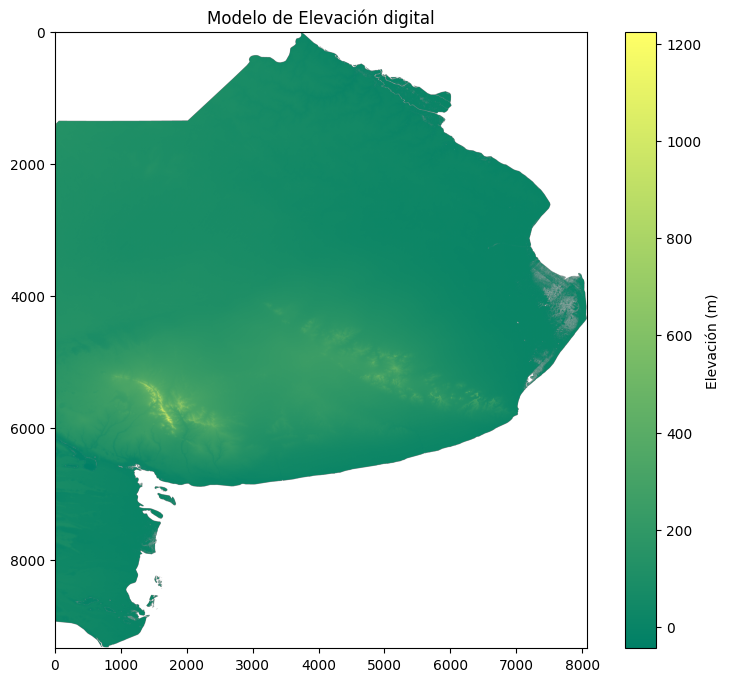

In [2]:
# Exploring data from 'bsas.tif'

with rasterio.open('bsas.tif') as src:
    data = src.read(1, masked=True)

plt.figure(figsize=(10,8))
plt.imshow(data, cmap= 'summer')
plt.colorbar(label='Elevación (m)')
plt.title("Modelo de Elevación digital")
plt.show()

In [3]:
# Show basic data
print(f"Dimensiones: {data.shape}")
print(f"Resolución (X, Y): {src.res}")
print(f"Sistema de referencia: {src.crs}")

Dimensiones: (9345, 8068)
Resolución (X, Y): (0.0008333333332920178, 0.0008333333333333335)
Sistema de referencia: EPSG:4326


In [4]:
# Show metadata
print("Valor de nodata:", src.nodata)
print("Transformación:", src.transform)

Valor de nodata: 0.0
Transformación: | 0.00, 0.00,-63.39|
| 0.00,-0.00,-33.26|
| 0.00, 0.00, 1.00|


In [5]:
#Veamos lo datos de elevación Banda 1
with rasterio.open('bsas.tif') as src:
    profile = src.profile.copy()
    data_1 = src.read(1)

    # Se crea una máscara binaria (1 : elevación = 3m)
    mask = np.where((data_1 <= 3) & (data_1 != src.nodata), 0, 1)

In [6]:
# checking unique values for create a mask
unique_values = np.unique(mask)
print("Valores únicos en la máscara: ", unique_values)

Valores únicos en la máscara:  [0 1]


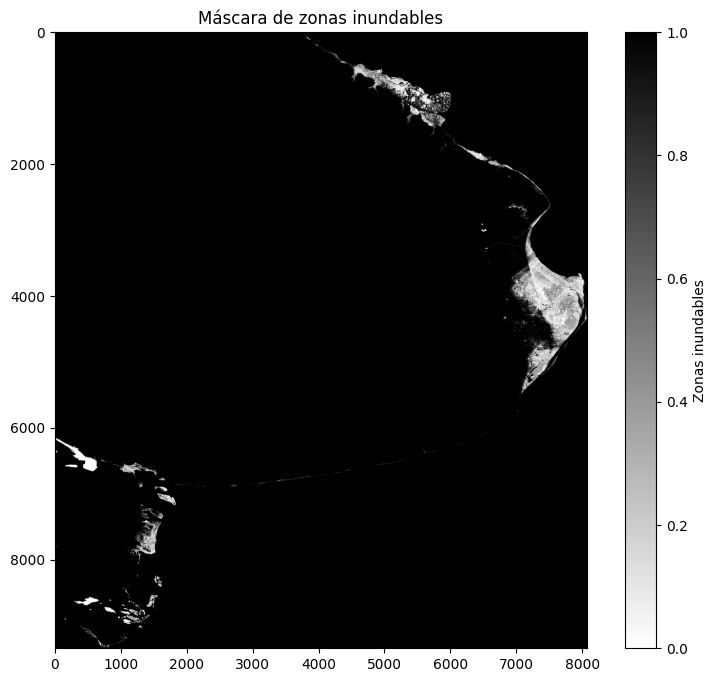

In [7]:
# Plotting mask

profile.update(dtype='uint8', nodata=0)
with rasterio.open('mask.tif', 'w', **profile) as dst:
    dst.write(mask, 1)
    
plt.figure(figsize=(10, 8))
plt.imshow(mask, cmap='binary', vmin=0, vmax=1)  # Ignorar 0 (NoData)
plt.colorbar(label='Zonas inundables')
plt.title('Máscara de zonas inundables')
plt.show()

In [8]:
# Georeferencing alignment

print(" CRS:", profile['crs'])
print(" Transformación afín:", profile['transform'])

 CRS: EPSG:4326
 Transformación afín: | 0.00, 0.00,-63.39|
| 0.00,-0.00,-33.26|
| 0.00, 0.00, 1.00|


In [25]:
#Veamos lo datos de elevación Banda 1
with rasterio.open('bsas.tif') as src:
    profile = src.profile.copy()
    image_bsas = src.read(1)

    # Se crea una máscara binaria (1 : elevación = 3m)
    mask = np.where((image_bsas <= 3) & (image_bsas != src.nodata) , 1, 0)

In [ ]:
#  Se crea una paleta de colores específica para la máscara binaria
colors = ['none','cornflowerblue'] # 0: transparente, 1: azul
cmap_agua = ListedColormap(colors)

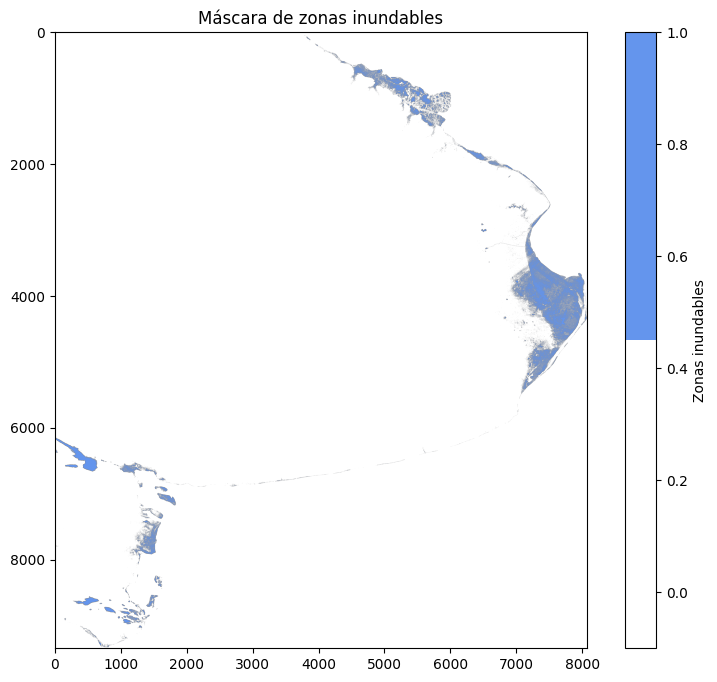

In [27]:
# Plotting mask
profile.update(dtype='uint8', nodata=0)
with rasterio.open('mask.tif', 'w', **profile) as dst:
    dst.write(mask, 1)
    
plt.figure(figsize=(10, 8))
plt.imshow(mask, cmap= cmap_agua, vmin=1, vmax=0)  # Ignorar 0 (NoData)
plt.colorbar(label='Zonas inundables')
plt.title('Máscara de zonas inundables')
plt.show()

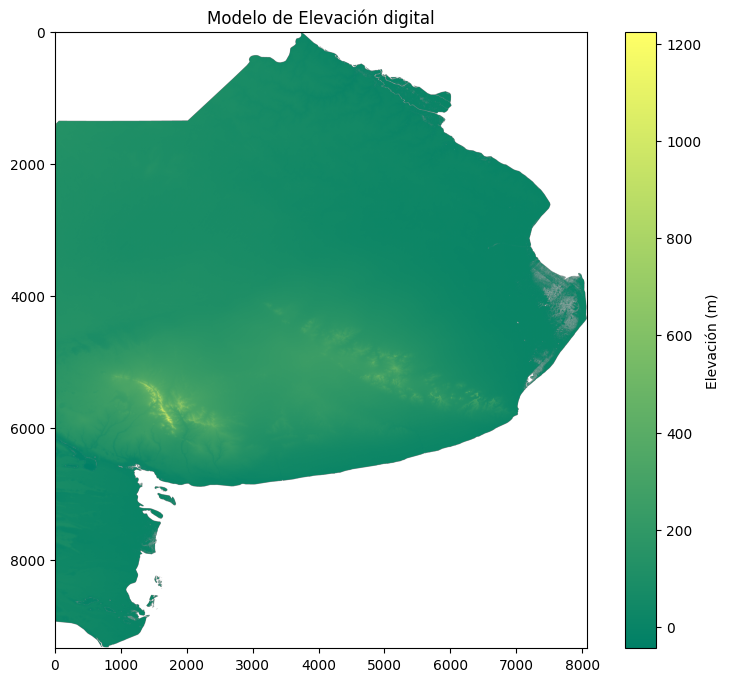

In [29]:
# Se plotea la imagen base (original de Bs. As)
with rasterio.open('bsas.tif') as src:
    data = src.read(1, masked=True)

plt.figure(figsize=(10,8))
plt.imshow(data, cmap= 'summer')
plt.colorbar(label='Elevación (m)')
plt.title("Modelo de Elevación digital")
plt.show()

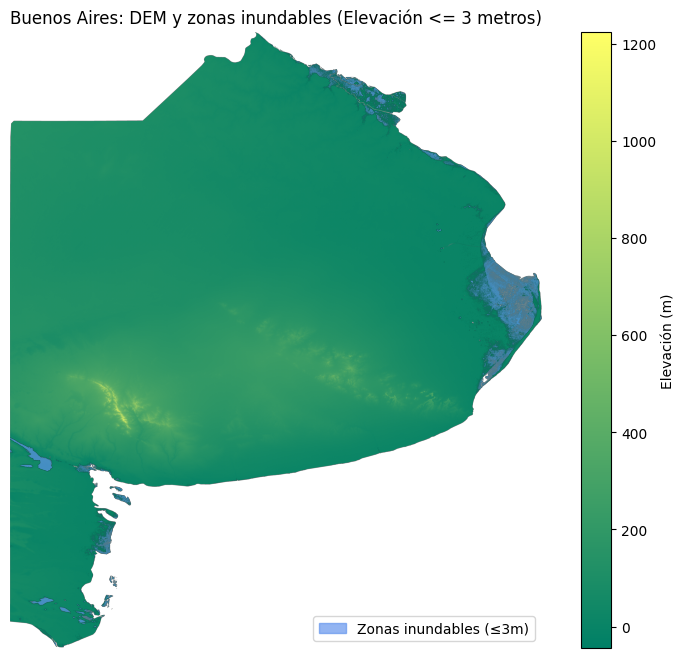

In [ ]:
# Se superpone la máscara de agua
with rasterio.open('bsas.tif') as src:
    data = src.read(1, masked=True)

plt.figure(figsize=(10,8))
plt.imshow(data, cmap= 'summer')
plt.colorbar(label='Elevación (m)')
plt.title("Modelo de Elevación digital")
plt.imshow(mask, cmap=cmap_agua, 
           vmin=0, 
           vmax=1,
           alpha=0.7) #transparencia del azul

plt.title('Buenos Aires: DEM y zonas inundables (Elevación <= 3 metros)')
plt.axis('off')
# Se añade leyenda explicativa
leyenda = [
    mpatches.Patch(color='cornflowerblue', label='Zonas inundables (≤3m)', alpha=0.7)
]
plt.legend(handles=leyenda, loc='lower right')
plt.savefig('zonas_inundables_bsas.png', dpi=300, bbox_inches='tight') 
plt.show()